### 由于之前`captcha_dataGen.ipynb`中用captcha库生成的验证码会有倾斜
### 为了先简化问题难度，本项目打算自己写验证码生成，生成工整排列的验证码

+ [python模块之PIL模块（生成随机验证码图片)](https://www.cnblogs.com/fu-yong/p/8811851.html) --- 主要看一下pillow的基本用法
+ [廖雪峰-python-pillow](https://www.liaoxuefeng.com/wiki/1016959663602400/1017785454949568)

In [389]:
import os
import numpy as np 
import pandas as pd 
from cv2 import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt 
from PIL import Image, ImageDraw, ImageFont
import random
import string

ROOT_DIR = os.getcwd()
DATA_DIR = os.path.join(ROOT_DIR, 'data_via_RG')
FONT = [r'/System/Library/Fonts/Avenir Next.ttc'] 

In [390]:
character_set_digit = string.digits
character_set_digit

'0123456789'

In [391]:
def gen_rand_text(character_set:str, length=4):
    '''
    生成len长度的随机字符串，字符来自于指定字符集
    character_set: 字符集
    length: 生成的字符串长度，默认为4
    '''
    return ''.join([ random.choice(character_set) for i in range(length)])

gen_rand_text(character_set_digit, length=4)

'6670'

上面函数可以被下面的lambda表达式替代

In [392]:
f = lambda character_set, length: ''.join([ random.choice(character_set) for i in range(length)])
f(character_set_digit, 4)

'1103'

用pillow生成一个指定size和color的背景图

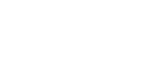

In [393]:
background_img = Image.new('RGB', (150,60), (255,255,255)) # 创建一个Image对象，new(mode, size, color=0) size=(width, height)
background_img

In [394]:
drawer = ImageDraw.Draw(background_img) # 在Image对象上创建画笔对象
drawer

In [395]:
# 创建字体对象，truetype(font=None, size=10, index=0, encoding="", layout_engine=None)
my_font = ImageFont.truetype(font=FONT[0], size=40) # 注意一点，之前用captcha库时候，font传入的是list类型，而这里传入的要是一个str类型
my_font

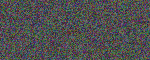

In [396]:
def background_rnd_fill(background_img, fill_range=(32,127)):
    '''
    将背景画布按像素随机填充颜色
    background_img: pillow的Image对象
    fill_range: tuple类型，每个像素的颜色范围0~255，默认(32,127)
    '''
    background_filled = background_img.copy() # 为了不破坏原背景，这里用copy
    drawer = ImageDraw.Draw(background_filled) # 在Image对象上创建画笔对象
    width, height = background_img.size # 获取背景画布的尺寸
    for x in range(width):
        for y in range(height):
            drawer.point( (x,y), fill=(
                random.randint(fill_range[0], fill_range[1]),
                random.randint(fill_range[0], fill_range[1]),
                random.randint(fill_range[0], fill_range[1])
            ) )# 每个像素填充随机颜色
    return background_filled

background_rnd_fill(background_img, fill_range=(32,127))

In [397]:
width, height = background_img.size # 获取背景画布的尺寸
# width//4,  (height - my_font.size) // 2

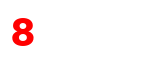

In [398]:
test_img = background_img.copy() # 为了不破坏原背景，这里用copy 
width, height = background_img.size # 获取背景画布的尺寸
test_drawer = ImageDraw.Draw(test_img)
# test_drawer.text((30,9), 'RG', fill=(255,0,0), font=my_font)
test_drawer.text( (10 + 0 * width//4, (height - my_font.size - 8) // 2), '8', fill=(255,0,0), font=my_font) # 8 是我试出来的，我猜测字体本身会有偏移
test_img

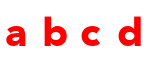

In [403]:
def draw_text(background_img, text:str, font=None, fill=(255,0,0)):
    '''
    在背景画布上画图，我进行了位置计算，使得字符在画布中能居中显示
    background_img: pillow的Image对象
    text: 要画的字符
    font: str类型，字体路径，默认为None
    fill: 画的字符的填充色，默认为(255,0,0)=red
    '''
    width, height = background_img.size # 获取背景画布的尺寸
    img = background_img.copy() # 为了不破坏原背景，这里用copy
    drawer = ImageDraw.Draw(img) # 在Image对象上创建画笔对象
    i = 0
    for character in text:
        drawer.text( (5 + i * width//4, (height - font.size - 8) // 2), character, fill=fill,font=font) 
        # 5 、8 是我试出来的，我猜测字体本身会有偏移，这里可能当 验证码字符不是4的时候还需要调整
        i += 1
    return img

draw_text(background_img, 'abcd', font=my_font, fill=(255,0,0))